In [1]:
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
df=pd.read_excel("D:\Project\LetsGrowMore\stock_data.xlsx")

In [4]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [5]:
df.head

<bound method NDFrame.head of            Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0    2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1    2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2    2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3    2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4    2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   
...         ...     ...     ...     ...     ...     ...                   ...   
2030 2010-07-27  117.60  119.50  112.00  118.80  118.65                586100   
2031 2010-07-26  120.10  121.00  117.10  117.10  117.60                658440   
2032 2010-07-23  121.80  121.95  120.25  120.35  120.65                281312   
2033 2010-07-22  120.30  122.00  120.25  120.75  120.90                293312   
2034 2010-07-21  122.10  123.00  121.05  121.10  121.55                658666  

In [6]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
df.shape

(2035, 8)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [11]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [14]:
df.duplicated().sum()

0

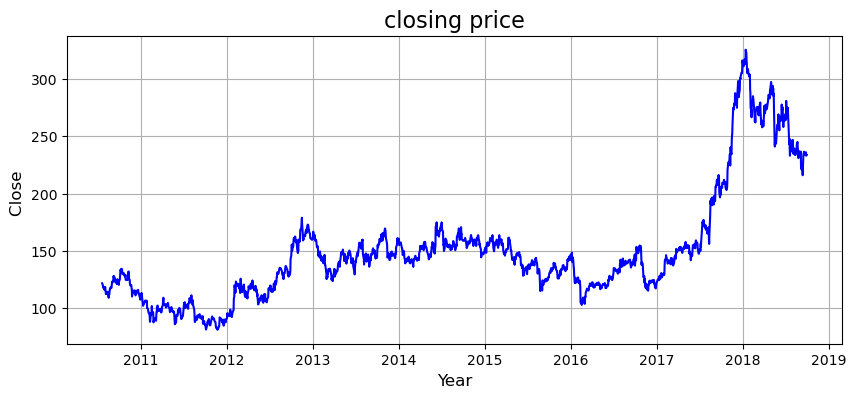

In [40]:
plt.figure(figsize=(10,4))
plt.grid(True)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Close ', fontsize=12)
plt.plot(df['Date'], df['Close'],color='blue')
plt.title('closing price',fontsize=16)
plt.show()

Text(0.5, 1.0, 'Correlation')

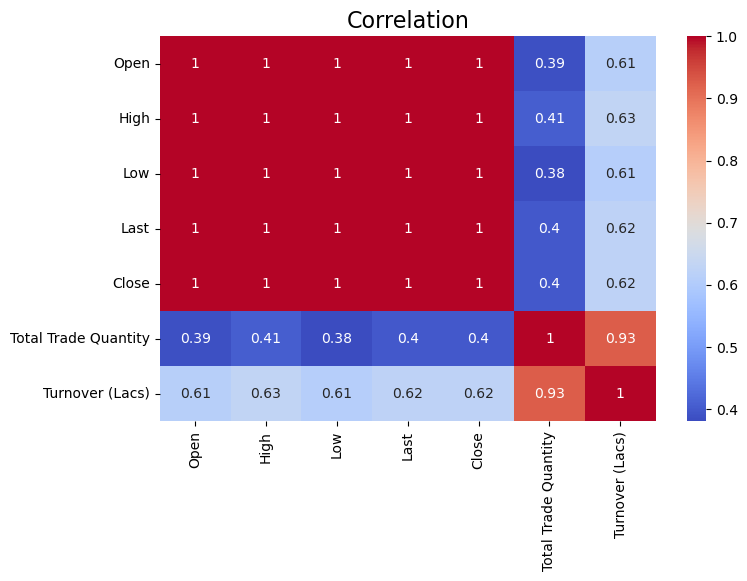

In [22]:
plt.figure(figsize=(8,5))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.title("Correlation", fontsize=16)

In [23]:
X=df.drop(['Close','Date'],axis=1)
y=df['Close']

In [24]:
from sklearn.preprocessing import StandardScaler


In [25]:
sc=StandardScaler()


In [26]:
X_sc=sc.fit_transform(X)


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)


In [28]:
clf=LinearRegression()


In [29]:
clf.fit(X_train,y_train)


LinearRegression()

In [30]:
clf.score(X_test,y_test)


0.9999221418308685

In [31]:
y_pred=clf.predict(X_test)


In [32]:
print("MSE :",round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),3))

MSE : 0.188
RMSE : 0.433
MAE : 0.286
MAPE : 0.002


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X, y, epochs=100, batch_size=32)

In [ ]:
print(predictions)
